# Notebook 1 - Primeros Pasos



*   Recuerda que puedes consultar la documentación sobre una función escribiendo **?** justo después de la función: *Ejemplo: np.maximum?*
*   Puedes ejecutar el contenido de una celda con el atajo de teclado **CTRL+ENTER**
*   Utiliza **TAB** cada vez que quieras autocompletar una llamada a una función.
*   Puedes ejecutar instrucciones de bash directamente desde el notebook usando **!** : *Ejemplo: !pip install tensorflow*
*   Recuerda que Google es tu amigo, y saber buscar la información en las documentaciones de las librerías es muy importante.
*   Una solución correcta no es la que funciona sino la que se entiende!
*   No dudes en preguntar cualquier duda al profesor que lleva todo el día dando la turra.

## 1. La función logística.

La función logística o sigmoide $ \phi(x) = \frac{1}{1 + \exp(-x)} $ es normalmente utilizada para mapear números reáles en probabilidades en el rango de [0, 1]. Esto por ejemplo nos será util en el modelo de Regresión Logística o incluso cuando veamos las Redes Neuronales (tranquilo, estamos empezando!).


---


**Tu tarea:** Implementa la función  logística en Python. Una vez la hayas implementado, utiliza la librería ***matplotlib*** para visualizar en una gráfica la forma funcional de tu función. Después, repite el ejercicio pero haciendo uso de la función logística que ya viene implementada dentro de la librería ***Scipy*** (*scipy.special.expit*()). Si tu función está implementada de forma correcta, ambas gráficas deberían de mostrar la misma forma funcional.


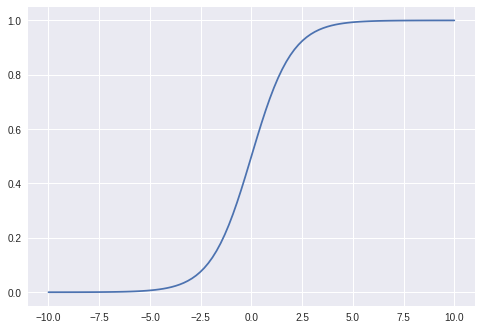

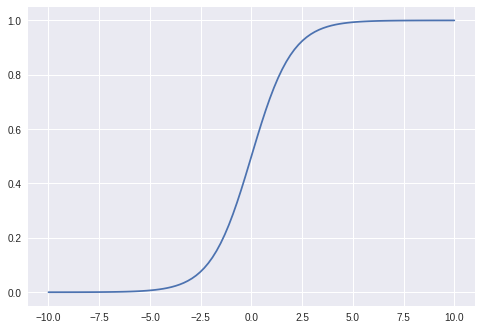

In [1]:
# Librería muy util que implementa muchas funcionalidades para el cálculo 
# numérico con vectores, matrices, etc.
import numpy as np
import scipy as sc

# Librería para la visualización de datos.
import matplotlib.pyplot as plt


# COMIENZA AQUÍ TU CÓDIGO.

# Función logística.
sigm = lambda x: 1 / (1 + np.exp(-x))

# Hacemos un plot de la función sigmoide.
_x = np.linspace(-10, 10, 100)
plt.plot(_x, sigm(_x))
plt.show()
plt.plot(_x, sc.special.expit(_x))
plt.show()

## 2. Variables aleatorias y distribuciones.

El módulo **scipy.stats** ofrece un conjunto de funciones con los que poder crear variables aleatorias que podemos utilizar para generar valores aleatorios que cumplan una distribución determinada, como por ejemplo, la distribución Normal.

---

**Tu tarea:** Define una variable aleatoria que se distribuya de forma Normal con media $\mu=5$ y varianza $\sigma^2=4$ y genera un vector con 10000 valores aleatorios diferentes usando la función ***scipy.stats.norm.rvs()***. Sin embargo, presta bien atención a la documentación de dichas funciones para ver cómo se define la media y varianza de dicha variable aleatoria en la librería **scipy**. No se cuántas me habré equivocado al no fijarme en esto...

Una vez tengas tu vector de valores aleatorios distribuidos de forma normal. Utiliza la función **plt.hist()** para obtener un histograma de los valores generados. ¿Se observa una distribución Normal en el histograma?

**Hint:** Prueba valores mayores del parámetro ***bins*** al crear tu histograma para definir el número de barras y tener una mayor resolución de la gráfica.

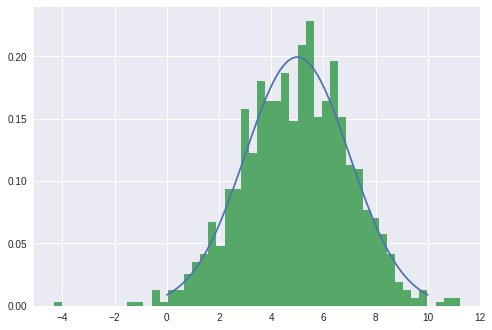

In [2]:
import numpy as np
import scipy as sc
import matplotlib.pyplot as plt

# COMIENZA AQUÍ TU CÓDIGO.

vals = sc.stats.norm(loc=5, scale=2).rvs(1000)

_x = np.linspace(0, 10, 100)
_p = sc.stats.norm(loc=5, scale=2).pdf(_x)

plt.plot(_x, _p)

plt.hist(vals, bins=50, normed=True)
plt.show()

## 3. Análisis exploratorio de Iris Setosa.


---

**Tu tarea:** Realiza un análisis exploratorio de los datos donde presentes:

1.   Tablas con estadísticos básicos: Para cada variable de entrada, reporta el valor mínimo y máximo, la media y la varianza. Puedes utilizar funciones de la librería **Numpy** como **np.mean()** o **np.std()** que te calcula cada uno de estos estadísticos, o directamente probar con la función **scipy.stats.describe()**, de la librería Scipy, que te reporta un conjunto de estadísticos, todos juntitos.

2.   Un histograma que superponga en diferente color las distribuciones para cada tipo de planta de la variable Petal Length (tercera variable).  Utiliza los valores almacenados en el vector $Y$ para colorear los puntos pertenecientes a cada clase con un color diferente.
3.   Un scatter plot en el que se visualice en el eje X la variable Sepal Length (primera variable) y en el eje Y la variable Petal Width (cuarta variable). Utiliza los valores almacenados en el vector $Y$ para colorear los puntos pertenecientes a cada clase con un color diferente.

Recuerda aportar para cada gráfica un título que describa el contenido de la visualización (ej: Histograma del Iris Dataset). Puedes acceder a la información del dataset que estamos utilizando (Iris Setosa), a través del atributo ***DESCR*** en la variable ***iris***: 

```
print(iris.DESCR)
```



Valores mínimos  :  [4.3 2.  1.  0.1]
Valores máximos  :  [7.9 4.4 6.9 2.5]
Valores medios   :  [5.84333333 3.054      3.75866667 1.19866667]
Valores variance :  [0.68569351 0.18800403 3.11317942 0.58241432]


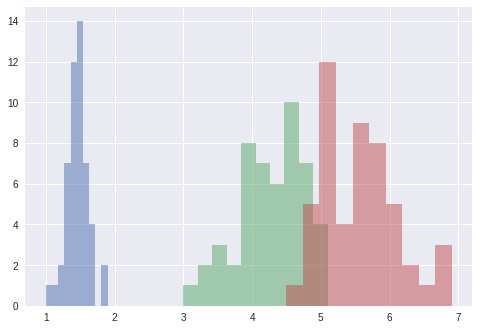

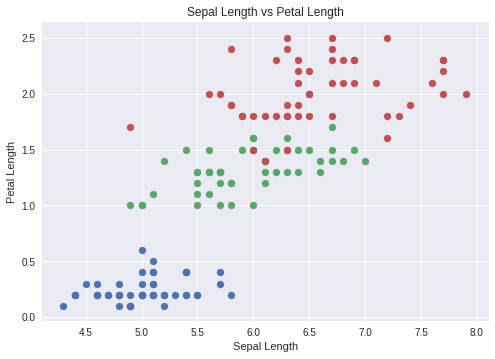

In [6]:
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import scipy as sc

iris = load_iris()

X = iris.data
Y = iris.target

# print(iris.DESCR)

# COMIENZA AQUÍ TU CÓDIGO.

print("Valores mínimos  : ", sc.stats.describe(X).minmax[0])
print("Valores máximos  : ", sc.stats.describe(X).minmax[1])
print("Valores medios   : ", sc.stats.describe(X).mean)
print("Valores variance : ", sc.stats.describe(X).variance)

plt.hist(X[Y==0, 2], bins=10, alpha=0.5)
plt.hist(X[Y==1, 2], bins=10, alpha=0.5)
plt.hist(X[Y==2, 2], bins=10, alpha=0.5)

plt.show()

plt.title("Sepal Length vs Petal Length")
plt.xlabel("Sepal Length")
plt.ylabel("Petal Length")
plt.scatter(X[Y == 0,0], X[Y == 0,3])
plt.scatter(X[Y == 1,0], X[Y == 1,3])
plt.scatter(X[Y == 2,0], X[Y == 2,3])

## 4. Simulando el problema de Monty Hall. (Bonus)

Como hemos visto, el problema de Monty Hall nos situa ante un escenario en el que tenemos tres puertas. Dos de ellas esconden una cabra, pero sin embargo otra esconde un lujoso coche. Inicialmente seleccionaremos una de las tres puertas de forma aleatoria. 

[?][?][?]

Después, el presentador abrirá una de las dos puertas
restantes y te dará la oportunidad de mantener la puerta seleccionada inicialmente o cambiar a la otra puerta que permanece cerrada. ¿Qué hacer?

Bueno, ya sabemos que la probabilidad nos recomienda siempre cambiar a la otra puerta. Pero... ¿Es esto cierto? Vamos a comprobar que esto se cumple empíricamente mediante una simulación del experimento de Monty Hall.

Puedes leer más sobre el problema aquí:
https://en.wikipedia.org/wiki/Monty_Hall_problem (en inglés)

---

**Tu tarea:** Implementa una simulación del problema de Monty Hall y comprueba que la probabilidad asignada a cambiar de puerta es igual a 2/3. Tu simulación deberá de seguir los siguientes pasos:

1.   Inicializa aleatoriamente una lista con el contenido tras cada una de las 3 puertas:

```
 ej : puertas = ["Coche", "Cabra", "Cabra"]
```
2.   Elije de forma aleatoria una de las tres puertas.
3.   De las dos puertas restante, abre una de las que contengan una "Cabra".

```
ej : print("Presentador: La puerta número 3 esconde una "Cabra")
```
4.   Asumiendo que siempre vamos a cambiar de puerta, evalua el contenido tras tu nueva puerta.
5.   Repite esta simulación varias veces contabilizando cuántas veces ganas el "Coche" en una variable.
6.   Calcula la probabilidad de ganar al cambiar de puerta, y comprueba que se aproxima al valor teórico de 2/3.

**Hint:** Puedes encontrar necesario utilizar funciones del módulo **numpy.random** para generar números aleatorios.


In [4]:
import numpy as np
import numpy.random as npr

# COMIENZA AQUÍ TU CÓDIGO.

sims = 100000
vict = 0

for i in range(sims):
  
  # Se elige aleatoriamente el índice
  # de la puerta que esconde el coche.
  coche = npr.randint(3)
  
  # Genera la puertas.
  puertas = ["Cabra" if j != coche else "Coche" for j in range(3)]  
  
  # Selecciona una de las puertas aleatoriamente.
  sel = npr.randint(3)
  
  for j in range(3):
    
    # Abre la primera puerta que oculte una
    # cabra y que no sea tu puerta.
    if j != sel and puertas[j] == "Cabra":
      
      abre = j
      break
  
  # Cambiamos de puerta al eliminar de la lista la puerta
  # seleccionada y la puerta abierta.
  cambio = [puerta for p, puerta in enumerate(puertas) if p not in (abre, sel)][0]
 
  # Contabilizamos como victoria si encontramos el coche tras
  # la puerta que hemos cambiado.
  if cambio == "Coche":
    vict += 1
    
print("La probabilidad de ganar cambiando la puerta es de ", vict/sims)

La probabilidad de ganar cambiando la puerta es de  0.66667
